Remove warnings:

In [25]:
import warnings
warnings.filterwarnings('ignore')

Read and transform data:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold

Tune the figures:

In [27]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Read data:

In [28]:
train = pd.read_csv('hw3_train.csv')
test = pd.read_csv('hw3_test_data.csv')

Look for correlations:

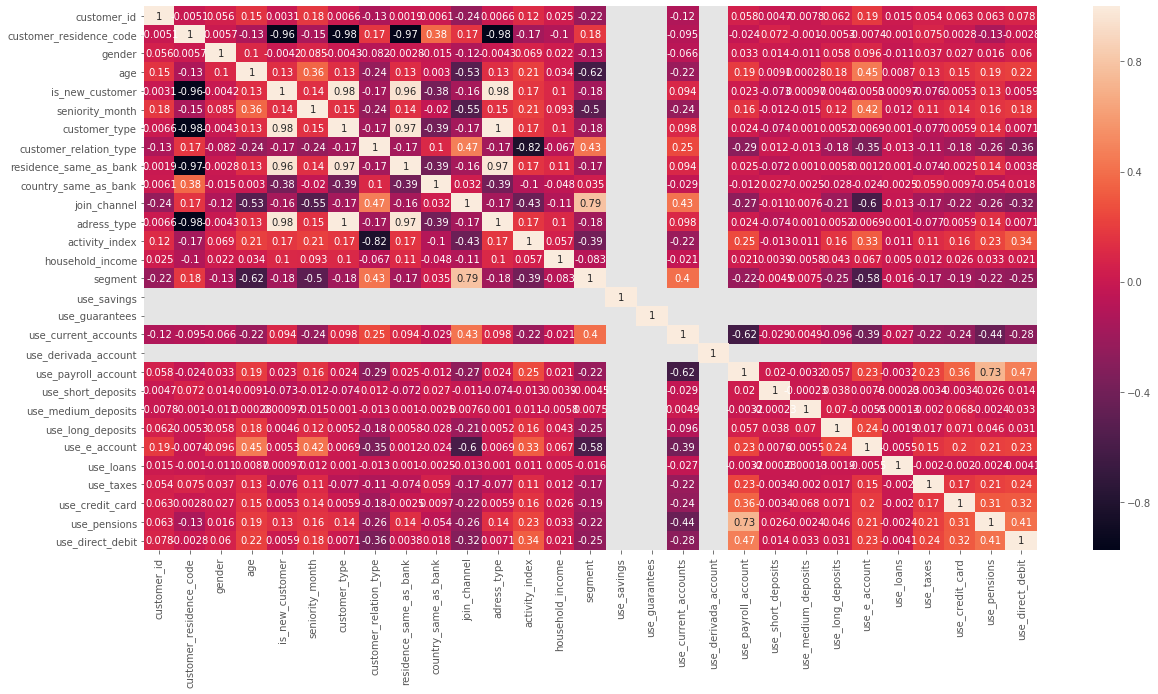

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr('kendall'), annot=True)
plt.show()

List of correlating features:

In [30]:
drop_list = ['join_channel', 'adress_type', 'is_new_customer', 'customer_type', 'use_direct_debit']

Select features:

In [31]:
y_train = train['use_direct_debit']
x_train = train.drop(drop_list, axis=1)

Cross validation:

In [32]:
basic_model = RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, max_features=5) 
model = BaggingClassifier(base_estimator=basic_model, n_estimators=100, random_state=7)

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='roc_auc')
print('Roc_auc: %.1f%% (%.1f%%)' % (results.mean()*100.0, results.std()*100.0))

Roc_auc: 91.5% (1.7%)


Fit the model at the whole set:

In [33]:
model.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=10,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=10,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators='warn',
                                                        n_jobs=None,
       

Prepare test set:

In [34]:
drop_list = ['join_channel', 'adress_type', 'is_new_customer', 'customer_type']
test = test.drop(drop_list, axis=1)

Make prediction:

In [35]:
pred = model.predict(test)

Write test set to dataframe:

In [36]:
df = pd.DataFrame(zip(test['customer_id'], pred), columns=['customer_id', 'use_direct_debit'])
df.to_csv('pred.csv', sep=',', index=False)